In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import logging

## From nreltest
import reltest
from reltest.mctest import MCTestPSI
from reltest.mmd import MMD_U, med_heuristic
from reltest import kernel

from kmod.mctest import SC_MMD
from helper import two_model_rej_samp, two_model_rej #, two_model_rej_samp
from reltest.ksd import KSD_U

from ex_models import generateTwoGauss
%load_ext autoreload
#%load_ext line_profiler
%autoreload 2
logging.getLogger().setLevel(logging.DEBUG)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Simple 1d Shifted Mean Example 2 Models

We have two models $P_0, P_1$ and one reference distribution $Q$:
$$
Q   \sim \mathcal{N}(0,1)  \\
P_0 \sim \mathcal{N}(1,1)  \\
P_1 \sim \mathcal{N}(2,1)
$$

DEBUG: 2020-01-01 13:11:31,049: _base._update_title_position(): update_title_pos
DEBUG: 2020-01-01 13:11:31,086: _base._update_title_position(): update_title_pos
DEBUG: 2020-01-01 13:11:31,117: _base._update_title_position(): update_title_pos
DEBUG: 2020-01-01 13:11:31,163: _base._update_title_position(): update_title_pos
DEBUG: 2020-01-01 13:11:31,188: _base._update_title_position(): update_title_pos


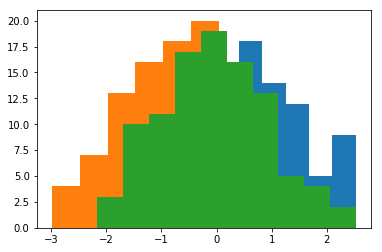

In [4]:
n_models = 2
dim = 10
n_samples = 100
model_params = {'mu0':0.5, 'sig0':1., # Model 0 Parameters
                  'mu1':-0.5, 'sig1':1., # Model 1 Parameters
                  'muR':0, 'sigR':1  # Reference Parameters
                 }
src = generateTwoGauss(model_params, dim, n_models)
P_0,P_1,Q = src.sample(n_samples)

ax = plt.hist(P_0.data()[:,0], label="P_0")
ax = plt.hist(P_1.data()[:,0], label="P_1")
ax = plt.hist(Q.data()[:,0], label="Reference")

In [5]:
## Setting
n_samples = 500
setting = {'n':2,
           'dim':dim}
n_trials = 300
eta = np.array([1,-1])

two_model_rej(src, n_samples, n_trials, eta)

{'PSI_mmd_lin': 0.05,
 'PSI_mmd_u': 0.04,
 'PSI_ksd_u': 0.04,
 'PSI_ksd_lin': 0.05333333333333334,
 'RelMMD': 0.05333333333333334,
 'RelKSD': 0.02666666666666667}

In [6]:
#x_lin = np.arange(start_point, end_point, step=intervals)
x_lin =np.array([50,500,1000,1500,2000])
# Plot P-Value with number of samples
eta= np.array([1,-1])
setting = {'n':2,
           'dim':dim}

n_trials = 300

res = two_model_rej_samp(src, x_lin, n_trials, eta)

INFO: 2020-01-01 13:20:01,932: helper.two_model_rej_samp(): Testing for 50 samples
INFO: 2020-01-01 13:20:13,692: helper.two_model_rej_samp(): Testing for 500 samples


KeyboardInterrupt: 

In [ ]:
np.save("../experiments/temp/2_model_linres_h0_final",res)
#res = np.load("../experiments/temp/2_model_linres_h1.npy").item()

In [ ]:
x_lin =np.array([50,500,1000,1500,2000])
# font options
font = {
    #'family' : 'normal',
    #'weight' : 'bold',
    'size'   : 22
}
import matplotlib
plt.rc('font', **font)
plt.rc('lines', linewidth=2)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#fig, axs = plt.subplots(1,1,sharex=True,sharey=True,figsize=(10,5))
#fig.add_subplot(111, frameon=False)
#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Number of samples')
plt.ylabel('Rejection Rate')
plt.plot(x_lin, res['PSI_mmd_u'],label="PSI MMD Complete",marker='o')
plt.plot(x_lin, res['PSI_mmd_lin'],label="PSI MMD Linear",marker='x')
plt.plot(x_lin, res['PSI_ksd_lin'],label="PSI KSD Linear",marker='D')
plt.plot(x_lin, res['PSI_ksd_u'],label="PSI KSD Complete",marker='s')
plt.plot(x_lin, res['RelMMD'],label="RelMMD", c='black',marker='v')
plt.plot(x_lin, res['RelKSD'],label="RelKSD", c='black',marker='v',linestyle='--')
plt.legend(loc='center left', bbox_to_anchor=(2, 1),
          mode='expand')
plt.ylim(0.0,0.1)
#plt.legend()
plt.savefig("../docs/graphs/2_H0_mean.pdf", bbox_inches='tight')

# Difference Variance Example

Reference distribution
$$
Q \sim \mathcal{N}(0,1) \\
$$
Model:
$$
P_0 \sim \mathcal{N}(0,2) \\
P_1 \sim \mathcal{N}(0,3)
$$

In [ ]:
## Setting
n_models = 2
n=2
n_samples = 1000
dim=1
eta =[1,-1]

model_params = {'mu0':np.ones((dim,1))*1, 'sig0':np.eye(dim)*2, # Model 0 Parameters
                  'mu1':np.ones((dim,1))*-1, 'sig1':np.eye(dim)*3, # Model 1 Parameters
                  'muR':np.ones((dim,1))*0, 'sigR':np.eye(dim)*1  # Reference Parameters
                 }

src = generateTwoGauss(model_params, dim, n_models)
P_0,P_1,Q = src.sample(n_samples)

ax = sns.kdeplot(P_0.data()[:,0], label="P_0")
ax = sns.kdeplot(P_1.data()[:,0], label="P_1")
ax = sns.kdeplot(Q.data()[:,0], label="Reference")

In [ ]:
## Setting
n_samples = 100
eta = [-1,1]
setting = {'n':1,
           'dim':dim}

n_trials = 100
p_PSI_blo = np.zeros(n_trials)
p_PSI_inc = np.zeros(n_trials)
p_rel = np.zeros(n_trials)

two_model_rej(src, setting, n_samples, n_trials, eta)

In [ ]:
start_point = 500
end_point = 1000
intervals = 100
x_lin = np.arange(start_point, end_point, step=intervals)
# Plot P-Value with number of samples
results = np.zeros((len(x_lin),1))
eta = [-1,1]
setting = {'n':2,
           'dim':dim}

n_trials = 100
res = two_model_rej_samp(src, setting, x_lin, n_trials,eta)
plt.axhline(0.05, color='r', linestyle='--')
plt.plot(x_lin, res['PSI_inc'],label="PSI inc")
plt.plot(x_lin, res['PSI_blo'],label="PSI block")
plt.plot(x_lin, res['RelMMD'],label="RelMMD")
plt.plot(x_lin, res['PSI_lin'],label="PSI linear")
plt.xlabel('Number of samples')
plt.ylabel('Rejection Rate')
plt.legend()
#plt.savefig("../docs/graphs/2_H1_var.pdf")